#### AP156- Activity 2
##### Nica Jane B. Ferrer
##### 2013-25765 

In [ ]:
 




# One can verify this in fact by generating a bunch of datasets 
# Exercise: Using the code from gendata_book_post.py, generate at
# least 100 datasets, calculate chi^2 using Eq. 1.28 and show that
# the distribution of chi^2(bold{a0}) is given by Eq. 1.29

# The chi^2 distribution PDF (Eq. 1.29) is available from scipy.stats
# Use the help function to figure out the parameters: help(chi2.pdf)
# Tip: check out the other functions available help(chi2)



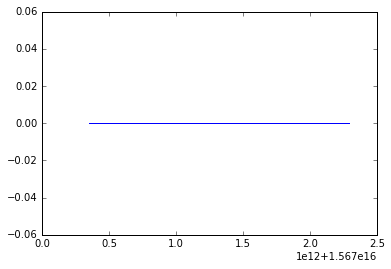

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gammainc
#The code given in gendata_book_post.py was used in this exercise


def fitfunc(t, a, om, phi, b):
    return a*np.sin(om*t + phi) * np.exp(-b*t)
a0s = []
om0s = []
phi0s = []
b0s = []

chi2vals = []
avals = []

densities = []
#Generate data sets:
for x in xrange(0,100):
    t = np.linspace(0, 3*np.pi, 11)
    y = np.sin(t)*np.exp(-t/10.) + 0.4*np.random.normal(scale=0.3,size=11)
    #Describe the nature of the twin peaks.

    #In general, save your data first...
    np.savetxt('dampedosc.dat', zip(t,y))
    data = np.loadtxt('dampedosc.dat')
    
    fit = curve_fit(fitfunc, data[:,0], data[:,1], p0=[1.1, 1.1, 0.1, 0.2])[0]
    a0s.append(fit[0])
    om0s.append(fit[1])
    phi0s.append(fit[2])
    b0s.append(fit[3])
    
    ###calculate the variance
    variances = []
    #calculate the mean:
    yvals = data[:,1]
    N = len(yvals)
    mu = sum(yvals)/N
   
    #calculate the variance
    for i in xrange(0,N):
        variance_i = (yvals[i]-mu)**2/N
        variances.append(variance_i)
    
    ###Calculate chi2 using 1.28:
    tvals = data[:,0]
    
    for j in xrange(0,N):
        chi2jcomp = ((yvals[j]-fitfunc(tvals[j], a0s[x], om0s[x], phi0s[x], b0s[x]))/variances[j])**2
        chi2val += chi2jcomp
    
    chi2vals.append(chi2val)
    P =chi2.pdf(chi2val,7)
    densities.append(P)
plt.plot(chi2vals,densities)
plt.show()
